# Get_English_Nonenglish.ipynb
This notebook:
* Analyzes the WhisperX output jsons to determine the labeled language for each transcript. 
* Plots the distribution of these discovered non-English languages. 

In [1]:
import pandas as pd
import os
import json
import pandas as pd
import seaborn as sns

import utils_general

path = "/data1/maria/Spotify-Podcasts/train-10min-whisperx-dir"

def get_text(dictionary):
    text = ""
    for t in dictionary["segments"]:
        text += t["text"]
    return text.strip()


language_dict = {}
transcript_count = 0
for root, dirs, files in os.walk(path):
    
    if files:
        for file in files:
            
            # there might also be error.json in this folder, so want to keep it to transcript.json
            
            if file == "transcript.json":
                full_filepath = os.path.join(root,"transcript.json")
                transcript_count += 1
                
                json_dict = {}
                with open(full_filepath) as f:
                    json_dict = json.loads(f.read())
                    
                language = json_dict["language"]
                
                if language not in language_dict:
                    language_dict[language] = 1
                else:
                    language_dict[language] += 1   

print("transcript count =", transcript_count)
print(language_dict)

transcript count = 105360
{'cy': 523, 'en': 101839, 'ms': 306, 'tl': 565, 'pt': 161, 'es': 139, 'la': 26, 'pa': 2, 'bn': 35, 'sv': 64, 'ru': 52, 'th': 50, 'yo': 38, 'km': 37, 'nn': 260, 'id': 367, 'tr': 4, 'zh': 37, 'mi': 105, 'sn': 4, 'hi': 164, 'nl': 29, 'de': 69, 'vi': 8, 'ht': 2, 'fr': 64, 'ur': 13, 'te': 60, 'ko': 17, 'hu': 33, 'el': 4, 'sw': 9, 'et': 1, 'ar': 74, 'no': 5, 'he': 9, 'da': 1, 'ta': 24, 'ja': 5, 'jw': 11, 'haw': 2, 'sa': 3, 'ne': 4, 'yi': 34, 'it': 2, 'sl': 2, 'ro': 10, 'kn': 2, 'mr': 8, 'my': 9, 'ml': 15, 'si': 3, 'lt': 13, 'bg': 3, 'pl': 1, 'br': 2, 'gl': 8, 'lv': 10, 'fi': 3, 'fa': 1, 'af': 6, 'gu': 2, 'am': 1}


In [2]:
print("number of english podcasts =", language_dict["en"])

print("total number of languages =", len(language_dict))

non_english_count = 0
for k,v in language_dict.items():
    if k != "en":
        non_english_count += v
        
print("number of non-english podcasts =", non_english_count)

print("percent non-english =", (non_english_count/(language_dict["en"] + non_english_count) * 100.0))

print("check:", language_dict["en"] + non_english_count)

number of english podcasts = 101839
total number of languages = 63
number of non-english podcasts = 3521
percent non-english = 3.3418754745634014
check: 105360


In [3]:
language_dict.pop("en")

101839

In [4]:
# https://github.com/openai/whisper/blob/main/whisper/tokenizer.py

LANGUAGES = {
    "en": "english",
    "zh": "chinese",
    "de": "german",
    "es": "spanish",
    "ru": "russian",
    "ko": "korean",
    "fr": "french",
    "ja": "japanese",
    "pt": "portuguese",
    "tr": "turkish",
    "pl": "polish",
    "ca": "catalan",
    "nl": "dutch",
    "ar": "arabic",
    "sv": "swedish",
    "it": "italian",
    "id": "indonesian",
    "hi": "hindi",
    "fi": "finnish",
    "vi": "vietnamese",
    "he": "hebrew",
    "uk": "ukrainian",
    "el": "greek",
    "ms": "malay",
    "cs": "czech",
    "ro": "romanian",
    "da": "danish",
    "hu": "hungarian",
    "ta": "tamil",
    "no": "norwegian",
    "th": "thai",
    "ur": "urdu",
    "hr": "croatian",
    "bg": "bulgarian",
    "lt": "lithuanian",
    "la": "latin",
    "mi": "maori",
    "ml": "malayalam",
    "cy": "welsh",
    "sk": "slovak",
    "te": "telugu",
    "fa": "persian",
    "lv": "latvian",
    "bn": "bengali",
    "sr": "serbian",
    "az": "azerbaijani",
    "sl": "slovenian",
    "kn": "kannada",
    "et": "estonian",
    "mk": "macedonian",
    "br": "breton",
    "eu": "basque",
    "is": "icelandic",
    "hy": "armenian",
    "ne": "nepali",
    "mn": "mongolian",
    "bs": "bosnian",
    "kk": "kazakh",
    "sq": "albanian",
    "sw": "swahili",
    "gl": "galician",
    "mr": "marathi",
    "pa": "punjabi",
    "si": "sinhala",
    "km": "khmer",
    "sn": "shona",
    "yo": "yoruba",
    "so": "somali",
    "af": "afrikaans",
    "oc": "occitan",
    "ka": "georgian",
    "be": "belarusian",
    "tg": "tajik",
    "sd": "sindhi",
    "gu": "gujarati",
    "am": "amharic",
    "yi": "yiddish",
    "lo": "lao",
    "uz": "uzbek",
    "fo": "faroese",
    "ht": "haitian creole",
    "ps": "pashto",
    "tk": "turkmen",
    "nn": "nynorsk",
    "mt": "maltese",
    "sa": "sanskrit",
    "lb": "luxembourgish",
    "my": "myanmar",
    "bo": "tibetan",
    "tl": "tagalog",
    "mg": "malagasy",
    "as": "assamese",
    "tt": "tatar",
    "haw": "hawaiian",
    "ln": "lingala",
    "ha": "hausa",
    "ba": "bashkir",
    "jw": "javanese",
    "su": "sundanese",
    "yue": "cantonese",
}

In [5]:
d = {}
for k, v in LANGUAGES.items():
    if k in language_dict.keys():
        d[v.capitalize()] = language_dict[k]

d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
print(d)

list_of_other = []
new_d = {"other": 0}
for k, v in d.items():
    if v >= 35:
        new_d[k] = v
    else:
        new_d["other"] += v
        list_of_other.append(k)

new_d["other"] = new_d.pop("other")
print()
print(new_d)
print()

print("list of other:")
for other in list_of_other:
    print(other+", ", end="")
    
print("length =", len(list_of_other))

{'Tagalog': 565, 'Welsh': 523, 'Indonesian': 367, 'Malay': 306, 'Nynorsk': 260, 'Hindi': 164, 'Portuguese': 161, 'Spanish': 139, 'Maori': 105, 'Arabic': 74, 'German': 69, 'French': 64, 'Swedish': 64, 'Telugu': 60, 'Russian': 52, 'Thai': 50, 'Yoruba': 38, 'Chinese': 37, 'Khmer': 37, 'Bengali': 35, 'Yiddish': 34, 'Hungarian': 33, 'Dutch': 29, 'Latin': 26, 'Tamil': 24, 'Korean': 17, 'Malayalam': 15, 'Urdu': 13, 'Lithuanian': 13, 'Javanese': 11, 'Romanian': 10, 'Latvian': 10, 'Hebrew': 9, 'Swahili': 9, 'Myanmar': 9, 'Vietnamese': 8, 'Galician': 8, 'Marathi': 8, 'Afrikaans': 6, 'Japanese': 5, 'Norwegian': 5, 'Turkish': 4, 'Greek': 4, 'Nepali': 4, 'Shona': 4, 'Finnish': 3, 'Bulgarian': 3, 'Sinhala': 3, 'Sanskrit': 3, 'Italian': 2, 'Slovenian': 2, 'Kannada': 2, 'Breton': 2, 'Punjabi': 2, 'Gujarati': 2, 'Haitian creole': 2, 'Hawaiian': 2, 'Polish': 1, 'Danish': 1, 'Persian': 1, 'Estonian': 1, 'Amharic': 1}

{'Tagalog': 565, 'Welsh': 523, 'Indonesian': 367, 'Malay': 306, 'Nynorsk': 260, 'Hindi'

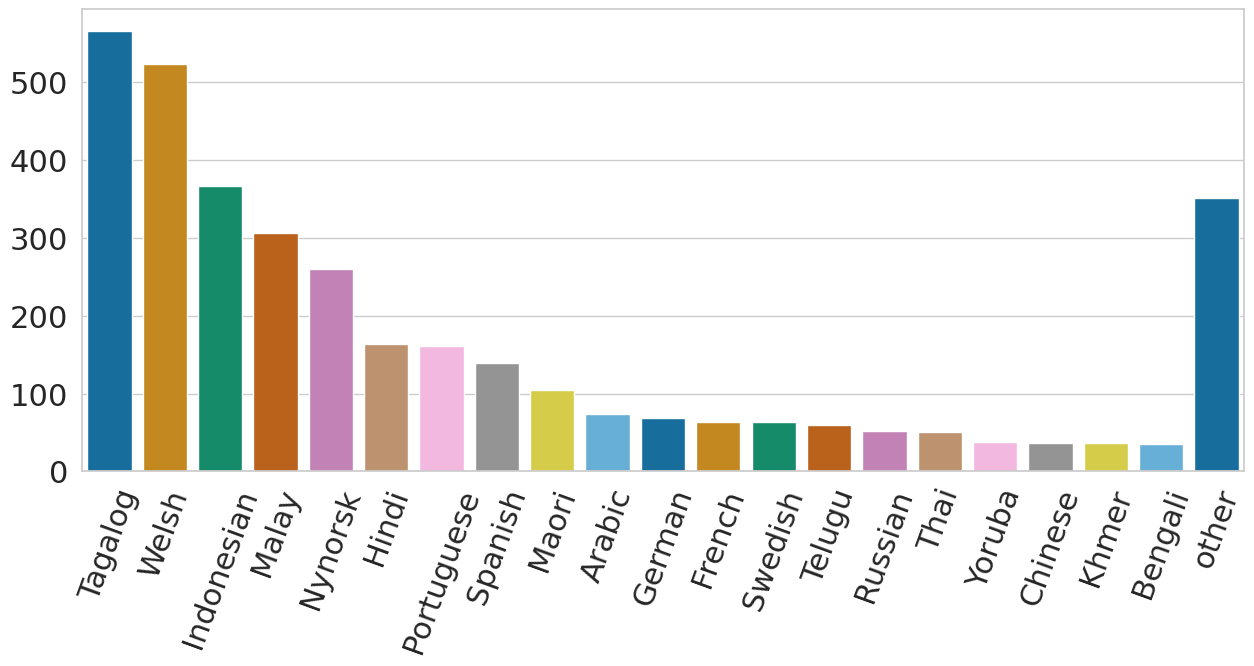

In [13]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,6
sns.set(font_scale=2.0)

sns.set_style("whitegrid")

ax = sns.barplot(y=list(new_d.values()), x=list(new_d.keys()), palette="colorblind")
# ax.set_title("Distribution of Non-English Podcasts")

for item in ax.get_xticklabels():
    item.set_rotation(70)